<a href="https://colab.research.google.com/github/ruthreich-star/LoanDefault/blob/main/LoanDefaultDatacleansin33.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
from google.colab import files
import pickle
import os
from scipy import stats
from scipy.stats import zscore

!pip install missingno
import missingno as msno

!pip install fancyimpute
import fancyimpute

!pip install --upgrade autoviz
from autoviz.AutoViz_Class import AutoViz_Class

warnings.filterwarnings("ignore")
%matplotlib inline

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 4.2 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29879 sha256=cce776bf98b72d6ae3efdd44269d3ed8d7f90c8ba04bb668e5ff128341eb064d
  Stored in directory: /root/.cache/pip/wheels/df/20/91/e4850b9a31cf660c1bc95515d3bcbc8010e869e5de6d5baf07
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11331 sha256=5b1ed6c40e2055072dd80970b84c2ecdd6beddf46e73c06ac67c257fec1d9caf
  Stored in directory: /root/.cache/pip/wheels/89/11/61/aa5a3167bfff49218cd043a73a83034b9eadd858b0059521be
Successfully built fancyimpute knnimpute
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
# BG_BLACK = "\033[40m"
# BG_RED = "\033[41m"
# BG_GREEN = "\033[42m"
# BG_YELLOW = "\033[43m"
# BG_BLUE = "\033[44m"
# BG_MAGENTA = "\033[45m"
# BG_CYAN = "\033[46m"
# BG_WHITE = "\033[47m"
# BG_DARK_GRAY = "\033[100m"
# BG_BRIGHT_RED = "\033[101m"
# BG_BRIGHT_GREEN = "\033[102m"
# BG_BRIGHT_YELLOW = "\033[103m"
# BG_BRIGHT_BLUE = "\033[104m"
# BG_BRIGHT_MAGENTA = "\033[105m"
# BG_BRIGHT_CYAN = "\033[106m"
# BG_WHITE = "\033[107m"
# RESET = "\033[0m" # Reset all formatting

In [3]:
np.random.seed(31071967)

In [4]:
download_pickels = True

In [57]:
import os, pathlib, sys
!mkdir -p pickles
pickle_file = '/content/pickles/load_default_clean.pkl'

if not os.path.exists(pickle_file):
# Upload file
  uploaded = files.upload()

# Read pickle into DataFrame
df = pd.read_pickle(pickle_file)

df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,repay_fail,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month
1,545583,2500,2500,2500,36 months,13.9800,85,4.0,RENT,20004,Not Verified,other,MI,19.8600,0,5,7,0,981,21.3000,10,3075,3075,2500,575,91,0,2010,7,2005,8,2013,7,2016,6
2,532101,5000,5000,5000,36 months,15.9500,176,4.0,RENT,59000,Not Verified,debt_consolidation,NY,19.5700,0,1,7,0,18773,99.9000,15,2949,2949,1909,874,176,1,2010,6,1994,4,2011,11,2012,3
3,877788,7000,7000,7000,36 months,9.9100,226,10.0,MORTGAGE,53796,Not Verified,other,TX,10.8000,3,3,7,0,3269,47.2000,20,8082,8082,7000,1082,1550,0,2011,9,1998,3,2014,3,2014,3
4,875406,2000,2000,2000,36 months,5.4200,60,10.0,RENT,30000,Not Verified,debt_consolidation,NY,3.6000,0,0,7,0,0,0.0000,15,2162,2162,2000,162,53,0,2011,9,1975,1,2014,2,2016,6
5,506439,3600,3600,3600,36 months,10.2500,117,10.0,MORTGAGE,675048,Not Verified,other,AL,1.5500,0,4,8,0,0,0.0000,25,4206,4206,3600,606,147,0,2010,4,1998,4,2013,5,2016,6


In [58]:
df.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,repay_fail,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month
count,38478.0000,38478.0000,38478.0000,38478.0000,38478.0000,38478.0000,38477.0000,38478.0000,38478.0000,38478.0000,38478.0000,38478.0000,38475.0000,38419.0000,38478.0000,38478.0000,38478.0000,38478.0000,38478.0000,38478.0000,38478.0000,38478.0000,38478.0000,38478.0000,38478.0000,38407.0000,38407.0000,38475.0000,38475.0000
mean,665032.4950,11095.0160,10832.1378,10150.4050,12.1623,323.1759,68997.1021,13.3762,0.1519,1.0840,9.3432,0.0579,14290.2377,49.1101,22.1090,11981.0085,11274.8116,9646.6616,2232.8274,2614.5116,0.1515,2010.2330,7.1318,1996.5841,6.8784,2012.7039,6.4673,2014.2415,6.1481
std,219185.4256,7405.2963,7146.7332,7127.9324,3.7095,209.0826,64476.2671,6.7297,0.5076,1.5348,4.4979,0.2457,21941.5415,28.3531,11.5883,9006.4163,8946.1606,7051.7500,2570.1864,4392.0029,0.3585,0.9626,3.4162,6.8327,3.5367,1.6116,3.4237,1.8639,2.9369
min,54734.0000,500.0000,500.0000,0.0000,5.4200,16.0000,1896.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2007.0000,1.0000,1946.0000,1.0000,2007.0000,1.0000,2007.0000,1.0000
25%,498372.2500,5200.0000,5100.0000,4950.0000,9.6200,166.0000,40000.0000,8.2000,0.0000,0.0000,6.0000,0.0000,3640.0000,25.7000,13.0000,5463.0000,4812.2500,4400.0000,658.0000,212.0000,0.0000,2010.0000,4.0000,1993.0000,4.0000,2012.0000,3.0000,2013.0000,4.0000
50%,644343.0000,9750.0000,9600.0000,8497.5000,11.9900,278.0000,58650.0000,13.4850,0.0000,1.0000,9.0000,0.0000,8840.0000,49.6000,20.0000,9673.5000,8954.0000,8000.0000,1335.0000,526.0000,0.0000,2011.0000,7.0000,1998.0000,7.0000,2013.0000,6.0000,2015.0000,6.0000
75%,826572.2500,15000.0000,15000.0000,14000.0000,14.7200,429.0000,82000.0000,18.6900,0.0000,2.0000,12.0000,0.0000,17266.0000,72.7000,29.0000,16402.7500,15487.0000,13317.5000,2795.0000,3170.0000,0.0000,2011.0000,10.0000,2001.0000,10.0000,2014.0000,9.0000,2016.0000,8.0000
max,1077430.0000,35000.0000,35000.0000,35000.0000,24.1100,1305.0000,6000000.0000,29.9900,11.0000,33.0000,47.0000,5.0000,1207359.0000,119.0000,90.0000,58564.0000,58564.0000,35000.0000,23611.0000,36115.0000,1.0000,2011.0000,12.0000,2008.0000,12.0000,2016.0000,12.0000,2016.0000,12.0000


In [59]:
df_with_Orig_nulls = df.copy() # keep for visualizations

In [60]:
unique_id_cols = ['id']
small_cat_cols = ['term','emp_length','home_ownership','verification_status','purpose','addr_state']
#6
cont_cols      = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','delinq_2yrs','inq_last_6mths','open_acc',
                  'revol_bal','revol_util','total_acc','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','last_pymnt_amnt','pub_rec']#,'months_between_earliest_to_issue']
#19
date_cols      = ['issue_d_year','issue_d_month','earliest_cr_line_year','earliest_cr_line_month','last_pymnt_d_year','last_pymnt_d_month','last_credit_pull_d_year','last_credit_pull_d_month']
#8
cat_cols       =  small_cat_cols
y_col          = ['repay_fail']
#1
MERGE_ID_COL   = 'id' # if we'll need to merge pickels later
x_cols             = cont_cols + date_cols


**Imputate original NULLS**

In [61]:
df.isnull().sum()

,0
id,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
emp_length,993
home_ownership,0
annual_inc,1


For a very small or nearly zero amount of NULL values, intuitive imputation can be applied.

In [62]:
#for 3 NULL in last_credit_pull_d_year,last_credit_pull_d_month - the loan issue date
df['last_credit_pull_d_year'] = df['last_credit_pull_d_year'].fillna(df['issue_d_year'])
df['last_credit_pull_d_month'] = df['last_credit_pull_d_month'].fillna(df['issue_d_month'])

In [63]:
#few rows fillna with median
df['annual_inc'] = df['annual_inc'].fillna(df['annual_inc'].median())

In [64]:

mask = (
    df['revol_bal' ].isna() | df['revol_bal' ].astype(str).str.strip().eq('') |
    df['revol_util'].isna() | df['revol_util'].astype(str).str.strip().eq('')
)

missing_rows = df.loc[mask, ['revol_bal', 'revol_util']]
print(missing_rows)

# כמה שורות נמצאו
print('rows with missing revol_bal or revol_util:', missing_rows.shape[0])


       revol_bal  revol_util
1123         0         NaN  
3069         0         NaN  
3540         0         NaN  
3646         0         NaN  
3668         0         NaN  
3886         0         NaN  
4260         0         NaN  
5131         0         NaN  
6114         0         NaN  
6626         0         NaN  
7512         0         NaN  
7663         0         NaN  
8193         0         NaN  
8206         0         NaN  
8212         0         NaN  
8364         0         NaN  
8485         0         NaN  
9613         0         NaN  
11700        0         NaN  
11984        0         NaN  
12335    49238         NaN  
12370        0         NaN  
13128        0         NaN  
13662        0         NaN  
15356        0         NaN  
15650        0         NaN  
15684        0         NaN  
17202        0         NaN  
17356        0         NaN  
18491        0         NaN  
19712        0         NaN  
20010        0         NaN  
20942        0         NaN  
21064        0

In [65]:
#because most of the REVOL_UTIL NaN have REVOL_BAL 0 ' ichek the REVAL_UTIL not NaN of REVOL_BAL = 0 - most of them are 0 so fill NanN of revol_util by 0 where Revoal_bal = 0

In [66]:

# המרה למספרים (אם יש מחרוזות), בלי הסרת אחוזים
ru_num = pd.to_numeric(df['revol_util'], errors='coerce')

# מסיכה: revol_bal == 0 ו-revol_util לא חסר
mask = (df['revol_bal'] == 0) & (~ru_num.isna())

vals = ru_num[mask]

less_1     = (vals < 1).sum()
greater_1  = (vals >= 1).sum()

print(f"<1: {less_1}")
print(f">= 1: {greater_1}")
# אופציונלי:
# print(f"= 1: {(vals == 5).sum()}")
# print(f"Total considered: {vals.shape[0]}")



<1: 850
>= 1: 69


In [67]:
print(df.isnull().sum()[df.isnull().any()])

emp_length            993
revol_bal               3
revol_util             59
last_pymnt_d_year      71
last_pymnt_d_month     71
dtype: int64


In [68]:
#for so few Nan put the median
df[['revol_bal', 'revol_util']] = df[['revol_bal', 'revol_util']].fillna(
    df[['revol_bal', 'revol_util']].median(numeric_only=True)
)
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].mode()[0])

In [69]:
print(df.isnull().sum()[df.isnull().any()])

last_pymnt_d_year     71
last_pymnt_d_month    71
dtype: int64


In [ ]:
#for last_payment_date - add the mean month between issue_date and payment_date to the issue_date in the line and cakculate the last_pymnt_d_year	last_pymnt_d_month with NAN

In [70]:
# נוודא טיפוסים נומריים עם NA חוקי
for c in ['issue_d_year','issue_d_month','last_pymnt_d_year','last_pymnt_d_month']:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce').astype('Int64')

# 1) בניית issue_d ו-last_pymnt_d מ-(year, month), יום=01
def build_dt(year_col, month_col):
    # נבנה מחרוזת 'YYYY-MM-01' רק כששנה וחודש קיימים
    y = df[year_col].astype('Int64')
    m = df[month_col].astype('Int64')
    s = (
        y.astype('string').str.zfill(4) + '-' +
        m.astype('string').str.zfill(2) + '-01'
    )
    # אם חסר שנה/חודש התוצאה תהיה 'NaT'
    s = s.mask(y.isna() | m.isna())
    return pd.to_datetime(s, errors='coerce', format='%Y-%m-%d')

df['issue_d']      = build_dt('issue_d_year', 'issue_d_month')
df['last_pymnt_d'] = build_dt('last_pymnt_d_year', 'last_pymnt_d_month')  # שימי לב לשם העמודה

# 2) חישוב הפרש חודשי ממוצע (אפשר גם median כדי להיות עמיד לחריגות)
m_valid = df['issue_d'].notna() & df['last_pymnt_d'].notna()
months_diff = (
    (df.loc[m_valid, 'last_pymnt_d'].dt.year  - df.loc[m_valid, 'issue_d'].dt.year) * 12 +
    (df.loc[m_valid, 'last_pymnt_d'].dt.month - df.loc[m_valid, 'issue_d'].dt.month)
)

avg_months = int(round(months_diff.mean())) if len(months_diff) else 0
# לחלופין: avg_months = int(round(months_diff.median()))
avg_months = max(avg_months, 0)  # להבטיח לא שלילי
print(f"Average months between issue_d and last_pymnt_d: {avg_months}")

# 3) השלמת שנה/חודש חסרים של last_pymnt_d ע"י issue_d + avg_months
m_need = (df['last_pymnt_d_year'].isna() | df['last_pymnt_d_month'].isna()) & df['issue_d'].notna()

imputed_dates = df.loc[m_need, 'issue_d'] + pd.DateOffset(months=avg_months)

df.loc[m_need, 'last_pymnt_d_year']  = imputed_dates.dt.year.astype('Int64')
df.loc[m_need, 'last_pymnt_d_month'] = imputed_dates.dt.month.astype('Int64')

# (אופציונלי) לשמור גם את התאריך המשוער עצמו
# df.loc[m_need, 'last_pymnt_d_imputed'] = imputed_dates

print("Rows filled:", m_need.sum())


Average months between issue_d and last_pymnt_d: 29
Rows filled: 71


In [71]:
# כל השורות שבהן last_pymnt_d_month הוא NaN / חסר
missing_month = df[df['last_pymnt_d'].isna()]

print(missing_month.shape)      # כמה שורות חסרות
missing_month.head(10)          # להציג את הראשונות


(71, 37)


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,repay_fail,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month,issue_d,last_pymnt_d
276,409248,4600,4600,4600,36 months,15.6800,161,10.0,RENT,75000,Not Verified,other,IL,8.0000,0,4,21,1,6909,29.2000,53,0,0,0,0,0,1,2009,5,1989,8,2011,10,2016,6,2009-05-01,NaT
2116,520008,3600,3600,3600,60 months,15.7000,87,5.0,RENT,38004,Verified,debt_consolidation,NY,22.8900,0,2,7,0,2697,59.9000,17,162,162,0,0,0,1,2010,5,2004,4,2012,10,2010,11,2010-05-01,NaT
2685,620448,2500,2500,2500,36 months,9.6200,80,1.0,RENT,19968,Verified,debt_consolidation,TX,2.9400,0,3,4,0,1523,38.1000,7,112,112,0,0,0,1,2010,11,2006,10,2013,4,2011,5,2010-11-01,NaT
2739,480401,10000,10000,3975,36 months,13.8500,341,10.0,RENT,140000,Not Verified,credit_card,IL,7.2500,0,3,23,0,47134,50.7000,41,450,179,0,0,0,1,2010,2,1999,12,2012,7,2010,7,2010-02-01,NaT
2763,758813,5000,5000,4175,36 months,13.9900,171,1.0,RENT,50000,Not Verified,small_business,VA,8.6900,0,1,4,1,4814,89.0000,17,283,236,0,0,0,1,2011,5,2004,3,2013,10,2011,11,2011-05-01,NaT
3287,593837,1000,1000,1000,36 months,16.3200,35,3.0,RENT,14400,Not Verified,debt_consolidation,MD,5.3300,0,0,5,0,1875,76.8000,11,45,45,0,0,0,1,2010,10,2007,5,2013,3,2011,3,2010-10-01,NaT
4095,454682,6000,6000,5950,36 months,14.6100,207,0.0,RENT,30000,Not Verified,debt_consolidation,NY,16.2000,0,2,4,0,16626,91.9000,6,0,0,0,0,0,1,2009,11,2004,12,2012,4,2016,6,2009-11-01,NaT
4173,772782,12325,12325,12075,60 months,11.4900,271,2.0,RENT,42000,Not Verified,house,PA,17.0300,0,1,11,0,29254,33.6000,18,12325,12075,0,0,0,1,2011,6,1998,9,2013,11,2016,6,2011-06-01,NaT
4260,772732,2000,2000,1900,36 months,18.3900,73,1.0,RENT,24000,Not Verified,other,AZ,22.6000,0,3,3,0,0,49.6000,16,90,90,0,0,0,1,2011,6,2006,5,2013,11,2011,11,2011-06-01,NaT
4355,496276,20000,20000,17375,36 months,10.2500,648,0.0,RENT,64000,Not Verified,debt_consolidation,NJ,6.0600,0,0,17,0,6587,18.3000,21,899,781,0,0,0,1,2010,4,2001,9,2012,9,2016,6,2010-04-01,NaT


In [72]:
df.drop(columns=['last_pymnt_d'], inplace=True, errors='ignore')

In [73]:
print(df.isnull().sum()[df.isnull().any()])

Series([], dtype: int64)


In [74]:
# keep a copy for before&after plots
df_with_outliers = df.copy()

**Outliers detection**

In [ ]:
print(df.isnull().sum()[df.isnull().any()])

Series([], dtype: int64)


In [75]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
cols_to_check_for_outliers = cont_cols
cols = cols_to_check_for_outliers
print(cols_to_check_for_outliers)

# 0) בדיקת NaN ואינסופים
# print(df[cols].isna().sum().sum(), "NaNs in input")  # אופציונלי

# 1) עותק מעובד לאימון LOF (לא נוגעים במקור בשלב זה)
imp = SimpleImputer(strategy='median')
scaler = StandardScaler()

X_imp = imp.fit_transform(df[cols])       # מחליף NaN בערכי חציון (רק לעותק)
X_scaled = scaler.fit_transform(X_imp)    # חשוב ל-LOF/DBSCAN

# 2) LOF
lof = LocalOutlierFactor(n_neighbors=25, contamination=0.05)
row_is_outlier = (lof.fit_predict(X_scaled) == -1)

print(f"LOF found {row_is_outlier.sum()} outlier rows")

# 3) החלת התוצאה על ה-DF המקורי: הפיכת הערכים באותן שורות ל-NaN
df.loc[row_is_outlier, cols] = np.nan


['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt', 'pub_rec']
LOF found 1924 outlier rows


In [76]:
df_with_nulls = df.copy() # keep for visualizations

In [40]:
print(df.isnull().sum()[df.isnull().any()])

Series([], dtype: int64)


the next only for documentation of other options

In [ ]:
# # keep a copy for before&after plots
# df_with_outliers = df.copy()

**# Imputate outlier nulls**

In [45]:
df.isnull().sum()

,0
id,0
loan_amnt,1924
funded_amnt,1924
funded_amnt_inv,1924
term,0
int_rate,1924
installment,1924
emp_length,0
home_ownership,0
annual_inc,1924


In [77]:
imputer = None
outliers_replacement = 'NaN'
imputer_alg = 'MICE' # options: 'MICE', 'KNN'

In [78]:
if imputer_alg == 'MICE':

  from sklearn.experimental import enable_iterative_imputer  # noqa
  from fancyimpute import IterativeImputer  # MICE-like
  imputer = IterativeImputer(max_iter=15)
  df[x_cols] = imputer.fit_transform(df[x_cols])

In [ ]:
# if imputer_alg == 'KNN':

#   from fancyimpute import KNN
#   imputer = KNN(k=5)
#   df[cols_to_check_for_outliers] = imputer.fit_transform(df[cols_to_check_for_outliers])

In [80]:
df.isnull().sum()

,0
id,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
emp_length,0
home_ownership,0
annual_inc,0


In [79]:
# 3. Find the cells that were NaN before
missing_mask = df_with_nulls.isna()

# 4. Compare old (NaN) vs new (imputed) values
for col in x_cols:
    replaced_values = df.loc[missing_mask[col], col]
    if not replaced_values.empty:
        print(f"Column: {col} impute {len(replaced_values)+1} NaN cells with values")
        #for idx, new_val in replaced_values.items():
        #    print(f"Row {idx}: filled with {new_val:.3f}")

Column: loan_amnt impute 1925 NaN cells with values
Column: funded_amnt impute 1925 NaN cells with values
Column: funded_amnt_inv impute 1925 NaN cells with values
Column: int_rate impute 1925 NaN cells with values
Column: installment impute 1925 NaN cells with values
Column: annual_inc impute 1925 NaN cells with values
Column: dti impute 1925 NaN cells with values
Column: delinq_2yrs impute 1925 NaN cells with values
Column: inq_last_6mths impute 1925 NaN cells with values
Column: open_acc impute 1925 NaN cells with values
Column: revol_bal impute 1925 NaN cells with values
Column: revol_util impute 1925 NaN cells with values
Column: total_acc impute 1925 NaN cells with values
Column: total_pymnt impute 1925 NaN cells with values
Column: total_pymnt_inv impute 1925 NaN cells with values
Column: total_rec_prncp impute 1925 NaN cells with values
Column: total_rec_int impute 1925 NaN cells with values
Column: last_pymnt_amnt impute 1925 NaN cells with values
Column: pub_rec impute 1925 N

***Visualize the result of cleansing***

**And Scatter plots**

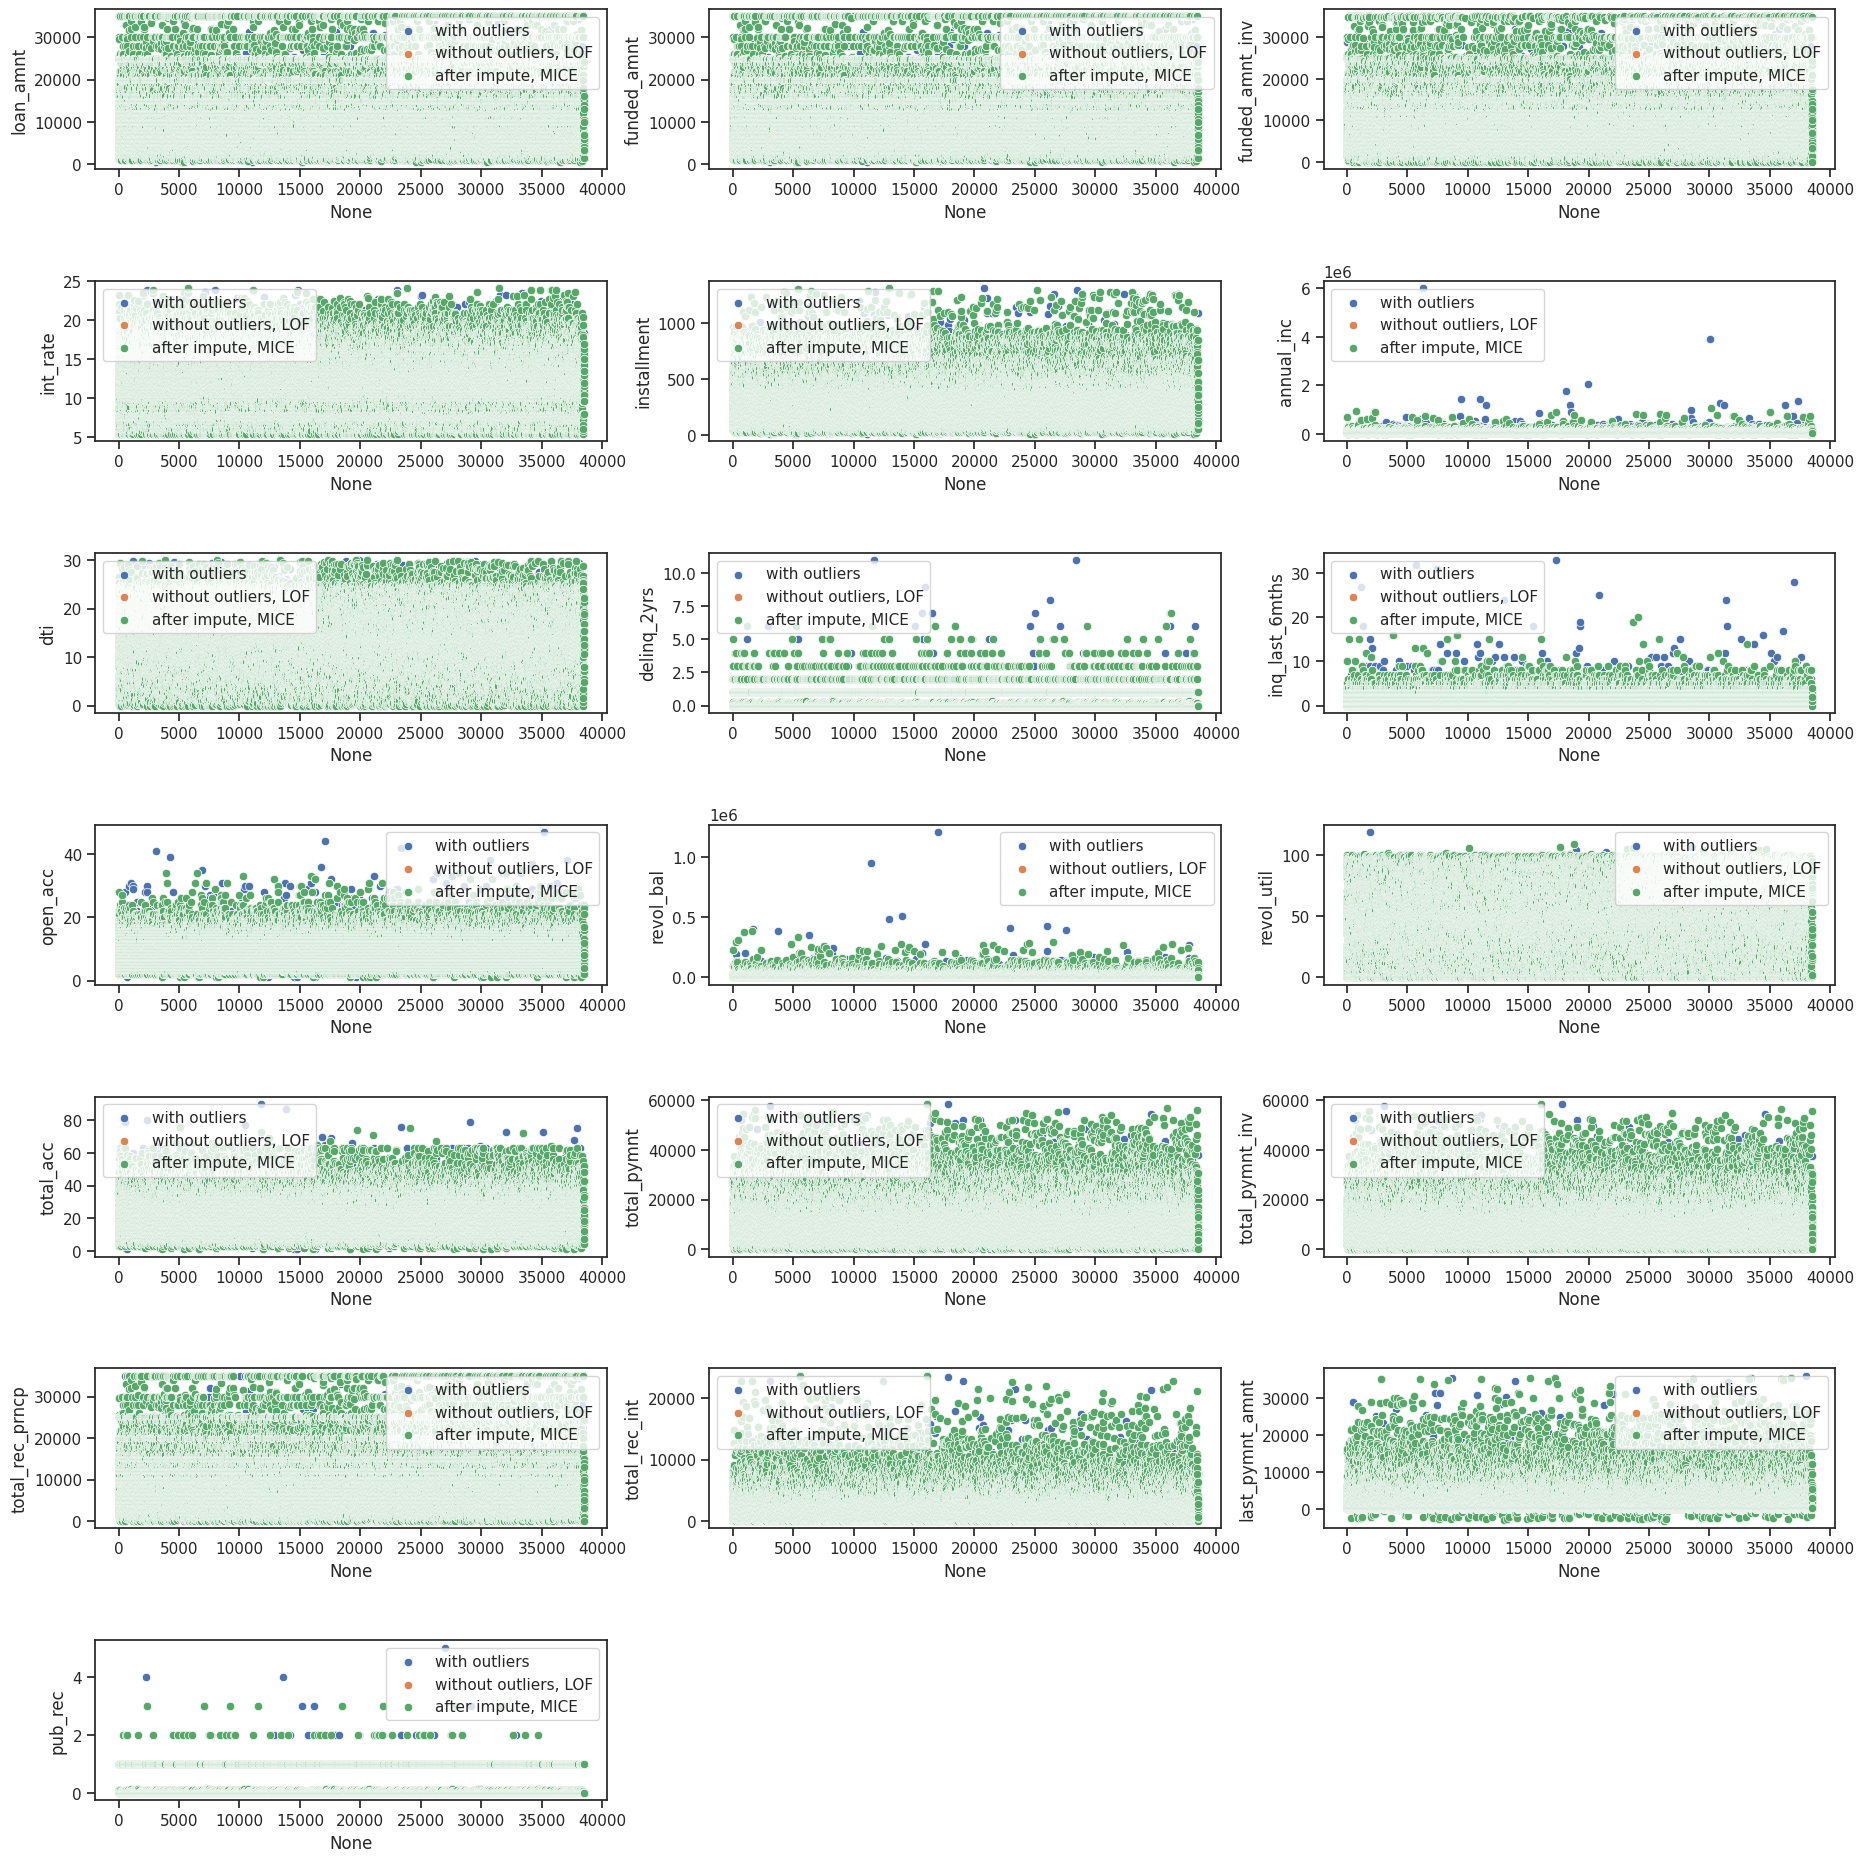

In [50]:
## scatterplots
plt.figure(figsize=(20,200))
for i, col in enumerate(df[cols_to_check_for_outliers], start=1):
  ax = plt.subplot(60, 3, i)
  sb.scatterplot(x=df_with_outliers.index, y=df_with_outliers[col], ax=ax, label='with outliers')
  sb.scatterplot(x=df_with_nulls.index, y=df_with_nulls[col], ax=ax, label=f"without outliers, {outliers_alg}")
  sb.scatterplot(x=df.index, y=df[col], ax=ax, label=f"after impute, {imputer_alg}")
  plt.subplots_adjust(hspace = 0.7)

plt.show()

In [81]:
import pandas as pd
import numpy as np

# Define num
num = df.select_dtypes(include=np.number)

# נניח שיש לך כבר את num (כל המשתנים המספריים)
corr = num.corr().abs()

# יצירת רשימת זוגות עם קורלציה גבוהה מ-0.9
high_corr_pairs = [
    (i, j, corr.loc[i, j])
    for i in corr.columns
    for j in corr.columns
    if i != j and corr.loc[i, j] > 0.9
]

# הפיכה לטבלה מסודרת
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Feature_1', 'Feature_2', 'Correlation'])

# מיון לפי ערך הקורלציה
high_corr_df = high_corr_df.sort_values(by='Correlation', ascending=False).drop_duplicates()

# הצגה יפה של הטבלה
print("🔗 Top Highly Correlated Feature Pairs (>0.9):")
display(high_corr_df)

# יצירת רשימת עמודות עם מתאם גבוה (מועמדות להסרה)
cols_to_drop = set([j for i, j, corr in high_corr_pairs if i != j])
print("\n📉 Suggested columns to consider dropping (due to high correlation):")
print(sorted(cols_to_drop))

🔗 Top Highly Correlated Feature Pairs (>0.9):


,Feature_1,Feature_2,Correlation
0,loan_amnt,funded_amnt,0.9849
3,funded_amnt,loan_amnt,0.9849
15,total_pymnt,total_pymnt_inv,0.9748
18,total_pymnt_inv,total_pymnt,0.9748
20,total_rec_prncp,total_pymnt,0.9737
16,total_pymnt,total_rec_prncp,0.9737
8,funded_amnt_inv,funded_amnt,0.9625
4,funded_amnt,funded_amnt_inv,0.9625
5,funded_amnt,installment,0.9560
12,installment,funded_amnt,0.9560



📉 Suggested columns to consider dropping (due to high correlation):
['funded_amnt', 'funded_amnt_inv', 'installment', 'loan_amnt', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp']


In [55]:
import pandas as pd, numpy as np
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler

num = df.select_dtypes(include=np.number)
summary = pd.DataFrame({
    "n": num.notna().sum(),
    "%null": num.isna().mean().round(3),
    "mean": num.mean(),
    "std": num.std(),
    "min": num.min(),
    "p1": num.quantile(0.01),
    "p99": num.quantile(0.99),
    "max": num.max(),
    "skew": num.apply(skew, nan_policy='omit'),
    "kurt": num.apply(kurtosis, nan_policy='omit')
}).sort_values("skew", ascending=False)

corr_top = num.corr().abs()
high_corr_pairs = [(i,j,corr_top.loc[i,j]) for i in corr_top.columns for j in corr_top.columns
                   if i<j and corr_top.loc[i,j]>0.9]

print(summary.head(10))
print("High-corr pairs (>0.9):", high_corr_pairs[:10])


                   n    %null      mean           std          min      \
revol_bal        38478   0.0   13634.757412  17966.258301     0.000000   
annual_inc       38478   0.0   65975.848415  41799.517059  1896.000000   
delinq_2yrs      38478   0.0       0.141124      0.459140     0.000000   
pub_rec          38478   0.0       0.055074      0.229813     0.000000   
total_rec_int    38478   0.0    2186.057737   2460.981998     0.000000   
last_pymnt_amnt  38478   0.0    2604.890504   4245.279484 -3379.368734   
inq_last_6mths   38478   0.0       1.035787      1.343763     0.000000   
repay_fail       38478   0.0       0.151463      0.358504     0.000000   
total_pymnt_inv  38478   0.0   11242.016979   8608.288468     0.000000   
total_pymnt      38478   0.0   11835.162387   8640.311079     0.000000   

                    p1        p99        max       skew      kurt     
revol_bal            0.00   86978.74   385489.0  5.602318  56.278835  
annual_inc       14400.00  200000.00  10800

**Using ANOVA to validate distribution of each col along the cleansing process**

In [56]:
results = []

for col in cols_to_check_for_outliers:

    groups = [
        df_with_outliers[col].dropna(),
        df_with_nulls[col].dropna(),
        df[col].dropna()
    ]

    # Check data validity before running ANOVA
    group_lengths = [len(g) for g in groups]
    unique_counts = [g.nunique() for g in groups]

    # Detect common problems
    if any(l < 2 for l in group_lengths):
        reason = "Too few samples in at least one group"
        f_stat, p_val = np.nan, np.nan
    elif all(u == 1 for u in unique_counts):
        reason = "All groups constant (no variance)"
        f_stat, p_val = np.nan, np.nan
    else:
        try:
            f_stat, p_val = stats.f_oneway(*groups)
            reason = (
                "Valid test" if np.isfinite(p_val)
                else "Invalid numeric result (possibly zero variance)"
            )
        except Exception as e:
            f_stat, p_val, reason = np.nan, np.nan, f"Error: {e}"

    results.append({
        "column along the process": col,
        "F_statistic": f_stat,
        "p_value": p_val,
        "significant": (p_val < 0.05) if np.isfinite(p_val) else False,
        "reason": reason
    })

anova_diagnostic = pd.DataFrame(results)
anova_diagnostic = anova_diagnostic.sort_values("p_value", na_position="last")

pd.set_option("display.float_format", "{:.4f}".format)
display(anova_diagnostic)

,column along the process,F_statistic,p_value,significant,reason
5,annual_inc,48.1930,0.0000,True,Valid test
8,inq_last_6mths,18.1867,0.0000,True,Valid test
10,revol_bal,17.4296,0.0000,True,Valid test
0,loan_amnt,11.7346,0.0000,True,Valid test
4,installment,10.1707,0.0000,True,Valid test
1,funded_amnt,8.8816,0.0001,True,Valid test
3,int_rate,7.1272,0.0008,True,Valid test
7,delinq_2yrs,6.9951,0.0009,True,Valid test
12,total_acc,6.8090,0.0011,True,Valid test
16,total_rec_int,3.5815,0.0278,True,Valid test


about 5% of records were flagged as outliers (LOF) and imputed (MICE); ANOVA shows a statistically detectable shift in some features, but the proportion of modified rows is small.

Much better now - blue dots out✌

In [82]:
from google.colab import files
import os

with open("./pickles/load_default_datacleansing_clean.pkl", 'wb') as f:
  pickle.dump(df, f)
  f.close()

# Get the list of files in the pickles directory
pickle_files = [f for f in os.listdir("./pickles/") if os.path.isfile(os.path.join("./pickles/", f))]

# Download each file individually
for file_name in pickle_files:
  files.download(os.path.join("./pickles/", file_name))

"pickles downloaded locally on your PC"

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'pickles downloaded locally on your PC'